# SMS SPAM CLASSIFICATION

# Importing Libraries

In [1]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import nltk

from math import *
from matplotlib.colors import ListedColormap

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
!pip install catboost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.4 MB/s eta 0:00:00


In [2]:
 nltk.download('punkt')
 nltk.download('wordnet')
 nltk.download('averaged_perceptron_tagger')
 nltk.download('all')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_p

True

# Dataset Loading

In [3]:
# Loading the dataset
df = pd.read_csv("/content/spam.csv", encoding='latin1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
# Dropping the unused collumns
drop_col_list = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df = df.drop(df[drop_col_list], axis=1)

# Renaming the columns for better readability
df.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<ipython-input-7-50e72ddc640a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(x= df["Target"], palette=['teal','coral'])


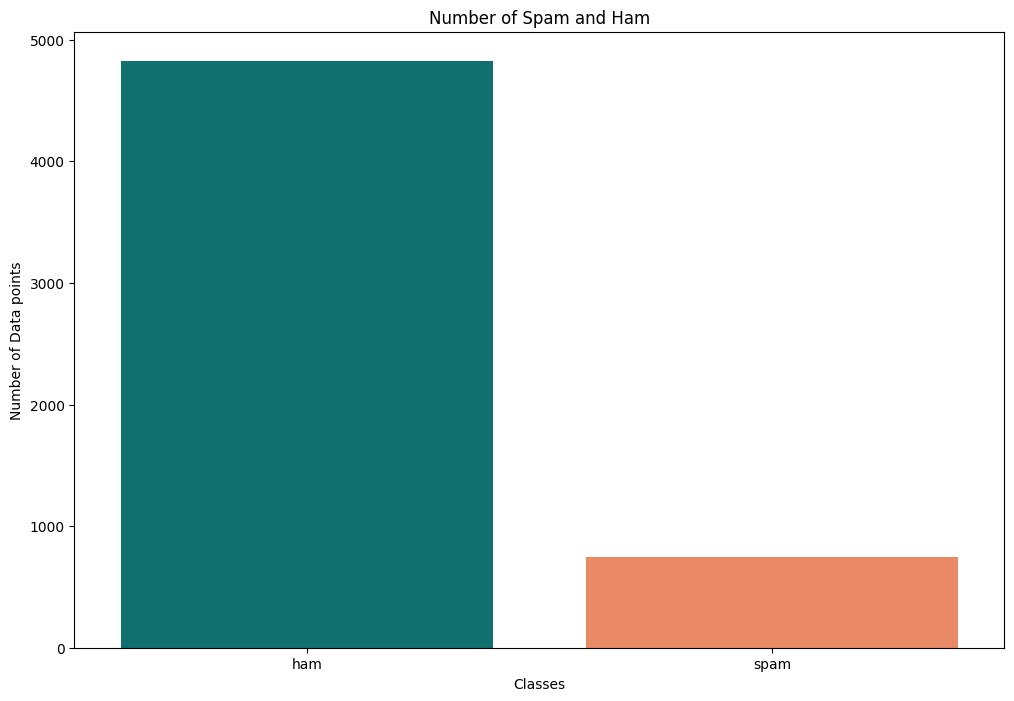

In [7]:
# Plotting the target and check if the data is imbalanced or not
plt.figure(figsize=(12,8))
fig = sns.countplot(x= df["Target"], palette=['teal','coral'])
fig.set_title("Number of Spam and Ham")
fig.set_xlabel("Classes")
fig.set_ylabel("Number of Data points")
plt.show(fig)

In [8]:
data = df.copy()


# Text Cleaning

In [9]:
def clean_text(text):
    clean = re.sub('[^a-zA-Z]', ' ', text) # Replacing all non-alphabetic characters with a space
    clean = clean.lower() # converting to lowecase
    clean = clean.split() # splits the cleaned text sms into a list of words
    clean = ' '.join(clean) # joins the list of words back into a string, using a single space as the separator between the words
    return clean

data.loc[:, "Clean_Text"] = data["Text"].apply(clean_text)

In [10]:
data


,Target,Text,Clean_Text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u ...
5568,ham,Will Ì_ b going to esplanade fr home?,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that so any other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i d...


# Tokenization

In [11]:
# The nltk.word_tokenize function from the Natural Language Toolkit (NLTK) is used
# to tokenize the text in the "Clean_Text" column of that row
data.loc[:, "Tokenized_Text"] = data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

In [12]:
data.head()

,Target,Text,Clean_Text,Tokenized_Text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,..."


# Stopwords Removing

In [13]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data.loc[:, "No_Stopword_Text"] = data["Tokenized_Text"].apply(remove_stopwords)

In [14]:
data[['Tokenized_Text','No_Stopword_Text']].head()

,Tokenized_Text,No_Stopword_Text
0,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"


In [15]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmas = [lemmatizer.lemmatize(word) for word in text]
    return lemmas

In [16]:
data.loc[:, "Lemmatized_Text"] = data["No_Stopword_Text"].apply(lemmatize_text)
data[['No_Stopword_Text', 'Lemmatized_Text']]

,No_Stopword_Text,Lemmatized_Text
0,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,"[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]"
...,...,...
5567,"[nd, time, tried, contact, u, u, pound, prize,...","[nd, time, tried, contact, u, u, pound, prize,..."
5568,"[b, going, esplanade, fr, home]","[b, going, esplanade, fr, home]"
5569,"[pity, mood, suggestions]","[pity, mood, suggestion]"
5570,"[guy, bitching, acted, like, interested, buyin...","[guy, bitching, acted, like, interested, buyin..."


In [17]:
stemmer = nltk.SnowballStemmer("english")

def stemming_text(text):
    text = [stemmer.stem(word) for word in text]
    return text

In [18]:
data.loc[:, 'Stemmed_Text'] = data['No_Stopword_Text'].apply(stemming_text)
data[['No_Stopword_Text', 'Stemmed_Text']]

,No_Stopword_Text,Stemmed_Text
0,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,...","[free, entri, wkli, comp, win, fa, cup, final,..."
3,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"[nah, think, goes, usf, lives, around, though]","[nah, think, goe, usf, live, around, though]"
...,...,...
5567,"[nd, time, tried, contact, u, u, pound, prize,...","[nd, time, tri, contact, u, u, pound, prize, c..."
5568,"[b, going, esplanade, fr, home]","[b, go, esplanad, fr, home]"
5569,"[pity, mood, suggestions]","[piti, mood, suggest]"
5570,"[guy, bitching, acted, like, interested, buyin...","[guy, bitch, act, like, interest, buy, someth,..."


In [19]:
data.loc[:, 'LS_Text'] = data['Lemmatized_Text'].apply(stemming_text)
data[['Lemmatized_Text', 'LS_Text']]

,Lemmatized_Text,LS_Text
0,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,...","[free, entri, wkli, comp, win, fa, cup, final,..."
3,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"[nah, think, go, usf, life, around, though]","[nah, think, go, usf, life, around, though]"
...,...,...
5567,"[nd, time, tried, contact, u, u, pound, prize,...","[nd, time, tri, contact, u, u, pound, prize, c..."
5568,"[b, going, esplanade, fr, home]","[b, go, esplanad, fr, home]"
5569,"[pity, mood, suggestion]","[piti, mood, suggest]"
5570,"[guy, bitching, acted, like, interested, buyin...","[guy, bitch, act, like, interest, buy, someth,..."


In [20]:
# Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in data["LS_Text"]:
    msg = ' '.join([row for row in i]) # Joins the strings within the list into a single space-separated string
    corpus.append(msg) # Appends the processed string (msg) to the corpus list

corpus[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think go usf life around though']

In [21]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

In [22]:
label_encoder = LabelEncoder()
data.loc[:, "Target"] = label_encoder.fit_transform(data["Target"])

<ipython-input-22-c3482b79442d>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, "Target"] = label_encoder.fit_transform(data["Target"])


# Data Training and Fitting

In [23]:
# Splitting the dataset into testing and training sets
y = data["Target"].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Creating a list of models
classifiers = [CatBoostClassifier(verbose=False),
               LogisticRegression(random_state=42),
               RandomForestClassifier(),
               SVC(),
               MultinomialNB(),
               MLPClassifier(),
               ]

for cls in classifiers:
    cls.fit(X_train, y_train)

In [25]:
# Cross Validation Score
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train, scoring="accuracy", cv=5)
    print(model.__class__.__name__, ":", cv_score.mean())

CatBoostClassifier : 0.9753182044661866
LogisticRegression : 0.95916287941699
RandomForestClassifier : 0.9771134363062615
SVC : 0.9750937375750531
MultinomialNB : 0.9627540980306302
MLPClassifier : 0.9807031450529209
